# Matplotlib Homework - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to a real-world situation and dataset:

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego. Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

## Instructions

Your tasks are to do the following:

* Before beginning the analysis, check the data for duplicate mice and remove any data associated with that mouse ID.

* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows  the number of mice per time point for each treatment regimen throughout the course of the study.

  * **NOTE:** These plots should look identical.

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** These plots should look identical.

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

* Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.


* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.


Here are some final considerations:


* You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

* See the [starter workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for help on what modules to import and expected format of the notebook.

## Hints and Considerations

* Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.

* You have been provided a starter notebook. Use the code comments as a reminder of steps to follow as you complete the assignment.

* Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always revisit old problems.

* While you are trying to complete this assignment, feel encouraged to constantly refer to Stack Overflow and the Pandas documentation. These are needed tools in every data analyst's tool belt.

* Remember, there are many ways to approach a data problem. The key is to break up your task into micro tasks. Try answering questions like:

  * How does my DataFrame need to be structured for me to have the right _x_-axis and _y_-axis?

  * How do I build a basic scatter plot?

  * How do I add a label to that scatter plot?

  * Where would the labels for that scatter plot come from?

  Again, don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of bite-sized tasks.

* Get help when you need it! There is never any shame in asking. But, as always, ask a _specific_ question. You'll never get a great answer to "I'm lost."

### Copyright

Trilogy Education Services © 2019. All Rights Reserved.

## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combined_data = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')

In [3]:
# Checking the number of mice in the DataFrame.

combined_data["Mouse ID"].value_counts() # 249 different mice.

g989    13
l700    10
x401    10
y260    10
q511    10
        ..
f932     1
h428     1
v199     1
d133     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicaterows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

duplicaterows # mouse g989. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# duplicatemouse = combined_data.loc[combined_data["Mouse ID"] == "g989", :]

mouse_id = combined_data.set_index(combined_data["Mouse ID"])

clean_combined = mouse_id.drop(["g989"])

clean_combined = clean_combined.reset_index(drop=True)

In [6]:
# Checking the number of mice in the clean DataFrame.

clean_combined["Mouse ID"].value_counts()

l509    10
h246    10
i635    10
r604    10
y260    10
        ..
b447     1
n482     1
h428     1
v199     1
t573     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
clean_combined["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen

# Capomulin
capomulin = clean_combined.loc[clean_combined["Drug Regimen"] == "Capomulin", :]
capomulin_mean = capomulin["Tumor Volume (mm3)"].mean()
capomulin_median = capomulin["Tumor Volume (mm3)"].median()

import numpy as np

capomulin_variance = np.var(capomulin["Tumor Volume (mm3)"])
capomulin_stddev = np.sqrt(capomulin_variance)
capomulin_sample = capomulin["Tumor Volume (mm3)"].sample(30)
capomulin_SEM = st.sem(capomulin_sample)

#Ramicane
ramicane = clean_combined.loc[clean_combined["Drug Regimen"] == "Ramicane", :]
ramicane_mean = ramicane["Tumor Volume (mm3)"].mean()
ramicane_median = ramicane["Tumor Volume (mm3)"].median()
ramicane_variance = np.var(ramicane["Tumor Volume (mm3)"])
ramicane_stddev = np.sqrt(ramicane_variance)
ramicane_sample = ramicane["Tumor Volume (mm3)"].sample(30)
ramicane_SEM = st.sem(ramicane_sample)

#Ketapril
ketapril = clean_combined.loc[clean_combined["Drug Regimen"] == "Ketapril", :]
ketapril_mean = ketapril["Tumor Volume (mm3)"].mean()
ketapril_median = ketapril["Tumor Volume (mm3)"].median()
ketapril_variance = np.var(ketapril["Tumor Volume (mm3)"])
ketapril_stddev = np.sqrt(ketapril_variance)
ketapril_sample = ketapril["Tumor Volume (mm3)"].sample(30)
ketapril_SEM = st.sem(ketapril_sample)

# Naftisol
naftisol = clean_combined.loc[clean_combined["Drug Regimen"] == "Naftisol", :]
naftisol_mean = naftisol["Tumor Volume (mm3)"].mean()
naftisol_median = naftisol["Tumor Volume (mm3)"].median()
naftisol_variance = np.var(naftisol["Tumor Volume (mm3)"])
naftisol_stddev = np.sqrt(naftisol_variance)
naftisol_sample = naftisol["Tumor Volume (mm3)"].sample(30)
naftisol_SEM = st.sem(naftisol_sample)

# Zoniferol
zoniferol = clean_combined.loc[clean_combined["Drug Regimen"] == "Zoniferol", :]
zoniferol_mean = zoniferol["Tumor Volume (mm3)"].mean()
zoniferol_median = zoniferol["Tumor Volume (mm3)"].median()
zoniferol_variance = np.var(zoniferol["Tumor Volume (mm3)"])
zoniferol_stddev = np.sqrt(zoniferol_variance)
zoniferol_sample = zoniferol["Tumor Volume (mm3)"].sample(30)
zoniferol_SEM = st.sem(zoniferol_sample)

# Stelasyn 
stelasyn = clean_combined.loc[clean_combined["Drug Regimen"] == "Stelasyn", :]
stelasyn_mean = stelasyn["Tumor Volume (mm3)"].mean()
stelasyn_median = stelasyn["Tumor Volume (mm3)"].median()
stelasyn_variance = np.var(stelasyn["Tumor Volume (mm3)"])
stelasyn_stddev = np.sqrt(stelasyn_variance)
stelasyn_sample = stelasyn["Tumor Volume (mm3)"].sample(30)
stelasyn_SEM = st.sem(stelasyn_sample)

# Placebo
placebo = clean_combined.loc[clean_combined["Drug Regimen"] == "Placebo", :]
placebo_mean = placebo["Tumor Volume (mm3)"].mean()
placebo_median = placebo["Tumor Volume (mm3)"].median()
placebo_variance = np.var(placebo["Tumor Volume (mm3)"])
placebo_stddev = np.sqrt(placebo_variance)
placebo_sample = placebo["Tumor Volume (mm3)"].sample(30)
placebo_SEM = st.sem(placebo_sample)

# Ceftamin
ceftamin = clean_combined.loc[clean_combined["Drug Regimen"] == "Ceftamin", :]
ceftamin_mean = ceftamin["Tumor Volume (mm3)"].mean()
ceftamin_median = ceftamin["Tumor Volume (mm3)"].median()
ceftamin_variance = np.var(ceftamin["Tumor Volume (mm3)"])
ceftamin_stddev = np.sqrt(ceftamin_variance)
ceftamin_sample = ceftamin["Tumor Volume (mm3)"].sample(30)
ceftamin_SEM = st.sem(ceftamin_sample)

# Infubinol
infubinol = clean_combined.loc[clean_combined["Drug Regimen"] == "Infubinol", :]
infubinol_mean = infubinol["Tumor Volume (mm3)"].mean()
infubinol_median = infubinol["Tumor Volume (mm3)"].median()
infubinol_variance = np.var(infubinol["Tumor Volume (mm3)"])
infubinol_stddev = np.sqrt(infubinol_variance)
infubinol_sample = infubinol["Tumor Volume (mm3)"].sample(30)
infubinol_SEM = st.sem(infubinol_sample)

# Propriva  
propriva = clean_combined.loc[clean_combined["Drug Regimen"] == "Propriva", :]
propriva_mean = propriva["Tumor Volume (mm3)"].mean()
propriva_median = propriva["Tumor Volume (mm3)"].median()
propriva_variance = np.var(propriva["Tumor Volume (mm3)"])
propriva_stddev = np.sqrt(propriva_variance)
propriva_sample = propriva["Tumor Volume (mm3)"].sample(30)
propriva_SEM = st.sem(propriva_sample)


means = [capomulin_mean, ramicane_mean, ketapril_mean, naftisol_mean, zoniferol_mean, stelasyn_mean, placebo_mean,
        ceftamin_mean, infubinol_mean, propriva_mean]
medians = [capomulin_median, ramicane_median, ketapril_median, naftisol_median, zoniferol_median, stelasyn_median, 
           placebo_median, ceftamin_median, infubinol_median, propriva_median]
variances = [capomulin_variance, ramicane_variance, ketapril_variance, naftisol_variance, zoniferol_variance, 
             stelasyn_variance, placebo_variance, ceftamin_variance, infubinol_variance, propriva_variance]
stddevs = [capomulin_stddev, ramicane_stddev, ketapril_stddev, naftisol_stddev, zoniferol_stddev, stelasyn_stddev, 
           placebo_stddev, ceftamin_stddev, infubinol_stddev, propriva_stddev]
SEMS = [capomulin_SEM, ramicane_SEM, ketapril_SEM, naftisol_SEM, zoniferol_SEM, stelasyn_SEM, placebo_SEM,
        ceftamin_SEM, infubinol_SEM, propriva_SEM]

sum_stat_table = pd.DataFrame({"Means": means, "Medians": medians, "Variances": variances, "Standard Deviations": stddevs,
                              "Standard Error of Means": SEMS}, index = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", 
                                                                         "Zoniferol", "Stelasyn", "Placebo", "Ceftamin", 
                                                                         "Infubinol", "Propriva"])

sum_stat_table.head(10)
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Means,Medians,Variances,Standard Deviations,Standard Error of Means
Capomulin,40.675741,41.557809,24.839296,4.983904,0.968374
Ramicane,40.216745,40.673236,23.383692,4.835669,0.771889
Ketapril,55.235638,53.698743,68.188930,8.257659,1.453029
Naftisol,54.331565,52.509285,65.817708,8.112811,1.309377
Zoniferol,53.236507,51.818479,48.266689,6.947423,1.282375
Stelasyn,54.233149,52.431737,59.122106,7.689090,1.309264
Placebo,54.033581,52.288934,60.830138,7.799368,1.314787
Ceftamin,52.591172,51.776157,39.069446,6.250556,1.089988
Infubinol,52.884795,51.820584,42.886388,6.548770,1.048669
Propriva,52.320930,50.446266,43.555716,6.599675,1.205364


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

regimens = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Ceftamin", 
         "Infubinol", "Propriva"]

sum_stat = pd.DataFrame({"Means": means, "Medians": medians, "Variances": variances, "Standard Deviations": stddevs,
                              "Standard Error of Means": SEMS, "Regimens": regimens})

sum_stat_groupby = sum_stat.groupby(["Regimens"])

sum_stat_groupby.count().head(10)

# This method produces everything in a single groupby function.

,Means,Medians,Variances,Standard Deviations,Standard Error of Means
Regimens,,,,,
Capomulin,1,1,1,1,1
Ceftamin,1,1,1,1,1
Infubinol,1,1,1,1,1
Ketapril,1,1,1,1,1
Naftisol,1,1,1,1,1
Placebo,1,1,1,1,1
Propriva,1,1,1,1,1
Ramicane,1,1,1,1,1
Stelasyn,1,1,1,1,1


## Bar Plots

In [10]:
clean_combined["Timepoint"].value_counts()

0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64

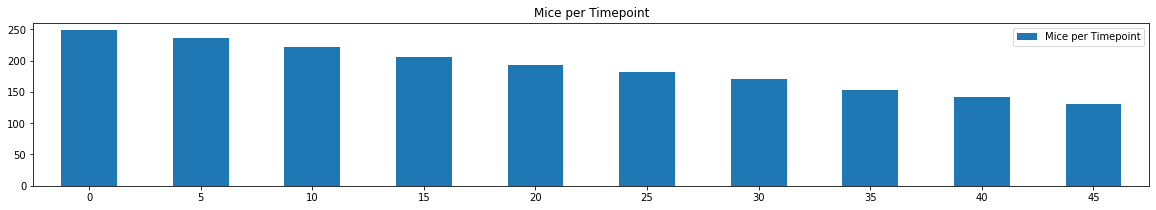

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
# using pandas.

zero = clean_combined.loc[clean_combined["Timepoint"] == 0, :]
zerocount = len(zero)
fifth = clean_combined.loc[clean_combined["Timepoint"] == 5, :]
fifthcount = len(fifth)
tenth = clean_combined.loc[clean_combined["Timepoint"] == 10, :]
tenthcount = len(tenth)
fifthteenth = clean_combined.loc[clean_combined["Timepoint"] == 15, :]
fifthteenthcount = len(fifthteenth)
twentieth = clean_combined.loc[clean_combined["Timepoint"] == 20, :]
twentiethcount = len(twentieth)
twentyfifth = clean_combined.loc[clean_combined["Timepoint"] == 25, :]
twentyfifthcount = len(twentyfifth)
thirtieth = clean_combined.loc[clean_combined["Timepoint"] == 30, :]
thirtiethcount = len(thirtieth)
thirtyfifth = clean_combined.loc[clean_combined["Timepoint"] == 35, :]
thirtyfifthcount = len(thirtyfifth)
fortieth = clean_combined.loc[clean_combined["Timepoint"] == 40, :]
fortiethcount = len(fortieth)
fortyfifth = clean_combined.loc[clean_combined["Timepoint"] == 45, :]
fortyfifthcount = len(fortyfifth)
lengths = [zerocount, fifthcount, tenthcount, fifthteenthcount, twentiethcount, twentyfifthcount, thirtiethcount,
          thirtyfifthcount, fortiethcount, fortyfifthcount]

pandasbar = pd.DataFrame({"Mice per Timepoint": lengths, "Timepoint":["0", "5", "10", "15", "20",
                                                                  "25", "30", "35", "40", 
                                                                  "45"]})
pandasbar


pandasbarplot = pandasbar.plot(kind = "bar", figsize = (20, 3))
pandasbarplot.set_xticklabels(pandasbar["Timepoint"], rotation=0)

plt.title("Mice per Timepoint")

plt.show()
plt.tight_layout()

([<matplotlib.axis.XTick at 0x7fa38704a470>,
 [Text(0, 0, '0'),
  Text(0, 0, '5'),
  Text(0, 0, '10'),
  Text(0, 0, '15'),
  Text(0, 0, '20'),
  Text(0, 0, '25'),
  Text(0, 0, '30'),
  Text(0, 0, '35'),
  Text(0, 0, '40'),
  Text(0, 0, '45')])

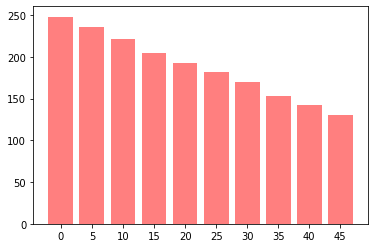

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the 
# study using pyplot.

x_axis = np.arange(len(lengths))

plt.bar(x_axis, lengths, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["0", "5", "10", "15", "20", "25", "30", "35", "40", "45"])

## Pie Plots

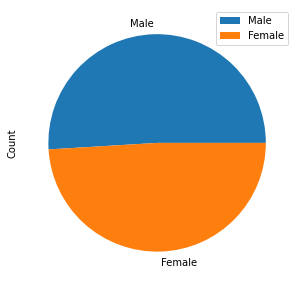

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


clean_combined["Sex"].value_counts() # male = 958, female = 922

sex_df = pd.DataFrame({"Sex": ["Male", "Female"], "Count": [958, 922]})

sex_df = sex_df.set_index("Sex")

#clean_combined.head()
plot = sex_df.plot.pie(y = "Count", figsize = (5,5))

([<matplotlib.patches.Wedge at 0x7fa38aa46320>,
 [Text(-0.6814042419013431, -0.8635324308437154, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.3716750410370962, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

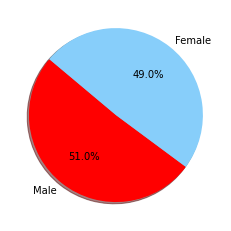

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]

sizes = [958, 922]

colors = ["red", "lightskyblue"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [15]:
final_tumor = clean_combined.loc[(clean_combined["Timepoint"] == 45) | (clean_combined["Timepoint"] == 40) | 
                                 (clean_combined["Timepoint"] == 35) | (clean_combined["Timepoint"] == 30)
                                 | (clean_combined["Timepoint"] == 25) | (clean_combined["Timepoint"] == 20)
                                 | (clean_combined["Timepoint"] == 15) | (clean_combined["Timepoint"] == 10)
                                 | (clean_combined["Timepoint"] == 5) | (clean_combined["Timepoint"] == 0), :] 
final_tumor = final_tumor.drop_duplicates("Mouse ID", 
                     keep = "last", inplace = False)
# not the brightest way to do it, I know. 


final_tumor["Mouse ID"].value_counts() # 248 is length, 
final_tumor["Mouse ID"].count() # 248 is count. 

final_tumor = final_tumor.sort_values("Tumor Volume (mm3)")

In [16]:
# But wait .... I already made a table showing mean, median, etc. of tumor cvolume by regimen. 
# four most promising = Capomulin, Ramicane, Infubinol, Ceftamin. 
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

final_tumor = final_tumor.loc[(final_tumor["Drug Regimen"] == "Capomulin") | (final_tumor["Drug Regimen"] == "Ramicane")|
                             (final_tumor["Drug Regimen"] == "Infubinol")|(final_tumor["Drug Regimen"] == "Ceftamin"), :]

final_tumor = final_tumor[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

capomulin_df = final_tumor.loc[final_tumor["Drug Regimen"] == "Capomulin", :]
capo_quartiles = capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq-capo_lowerq #7.781863460000004
capo_lower_bound = capo_lowerq - (1.5*capo_iqr) #20.70456164999999
capo_upper_bound = capo_upperq + (1.5*capo_iqr) #51.83201549
capomulin_df.sort_values("Tumor Volume (mm3)") 

ramicane_df = final_tumor.loc[final_tumor["Drug Regimen"] == "Ramicane", :]
rami_quartiles = ramicane_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq-rami_lowerq #9.098536719999998
rami_lower_bound = rami_lowerq - (1.5*rami_iqr) #17.912664470000003
rami_upper_bound = rami_upperq + (1.5*rami_iqr) #54.30681135
ramicane_df.sort_values("Tumor Volume (mm3)") 

infubinol_df = final_tumor.loc[final_tumor["Drug Regimen"] == "Infubinol", :]
infu_quartiles = infubinol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq-infu_lowerq #11.477135160000003
infu_lower_bound = infu_lowerq - (1.5*infu_iqr) #36.83290494999999
infu_upper_bound = infu_upperq + (1.5*infu_iqr) # 82.74144559000001
infubinol_df.sort_values("Tumor Volume (mm3)") # one outlier: mouse c326 @ 36.321346

ceftamin_df = final_tumor.loc[final_tumor["Drug Regimen"] == "Ceftamin", :]
ceft_quartiles = ceftamin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq #15.577752179999997
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr) #25.355449580000002
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr) #87.66645829999999
ceftamin_df.sort_values("Tumor Volume (mm3)") # no outliers

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
1730,x226,Ceftamin,45.000000
1570,u153,Ceftamin,45.000000
594,b447,Ceftamin,45.000000
1538,t573,Ceftamin,45.000000
1109,l558,Ceftamin,46.784535
927,h531,Ceftamin,47.784682
840,f436,Ceftamin,48.722078
1569,u149,Ceftamin,52.925348
617,b759,Ceftamin,55.742829
600,b487,Ceftamin,56.057749


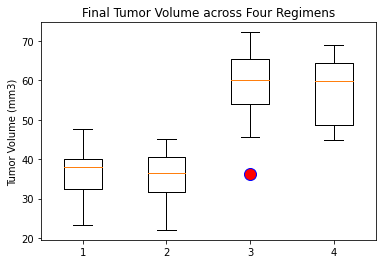

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

capo_box_plot = capomulin_df["Tumor Volume (mm3)"]
rami_box_plot = ramicane_df["Tumor Volume (mm3)"]
infu_box_plot = infubinol_df["Tumor Volume (mm3)"]
ceft_box_plot = ceftamin_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume across Four Regimens')
ax1.set_ylabel("Tumor Volume (mm3)")
# ax2.set_title('Final Tumor Volume across Four Regimens')
# ax2.set_ylabel("Tumor Volume (mm3)")
# ax2.boxplot(rami_box_plot)
# ax3.set_title('Final Tumor Volume across Four Regimens')
# ax3.set_ylabel("Tumor Volume (mm3)")
# ax3.boxplot(prop_box_plot)
# ax4.set_title('Final Tumor Volume across Four Regimens')
# ax4.set_ylabel("Tumor Volume (mm3)")
# ax4.boxplot(ceft_box_plot)

outliers = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='b')

plt.boxplot([capo_box_plot, rami_box_plot, infu_box_plot, ceft_box_plot], flierprops=outliers)

plt.show()

## Line and Scatter Plots

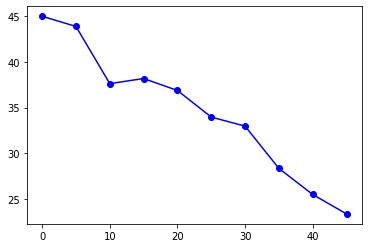

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_line_plot = clean_combined.loc[clean_combined["Drug Regimen"] == "Capomulin", :]

s185 = capomulin_line_plot.loc[capomulin_line_plot["Mouse ID"] == "s185", :]

s185 = s185[["Timepoint", "Tumor Volume (mm3)"]]

xaxis = s185["Timepoint"]
yaxis = s185["Tumor Volume (mm3)"]

plt.plot(xaxis, yaxis, marker = 'o', color='blue', label="i")


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
